## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [43]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [44]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
# Check dimension of data

In [46]:
print(iris.ndim)

2


In [47]:
#Check data Type

In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
# Check for NaN/Null values

In [50]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [51]:
iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

In [52]:
iris.median()

Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [53]:
iris_pf = iris.fillna(iris.median())

In [54]:
iris_pf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [55]:
X = iris_pf.loc[:,iris_pf.columns !='Species']
y = iris_pf['Species']

In [56]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_pf['Species'] = le.fit_transform(iris_pf['Species'])

### Find the distribution of target variable (Class) (1 Marks)

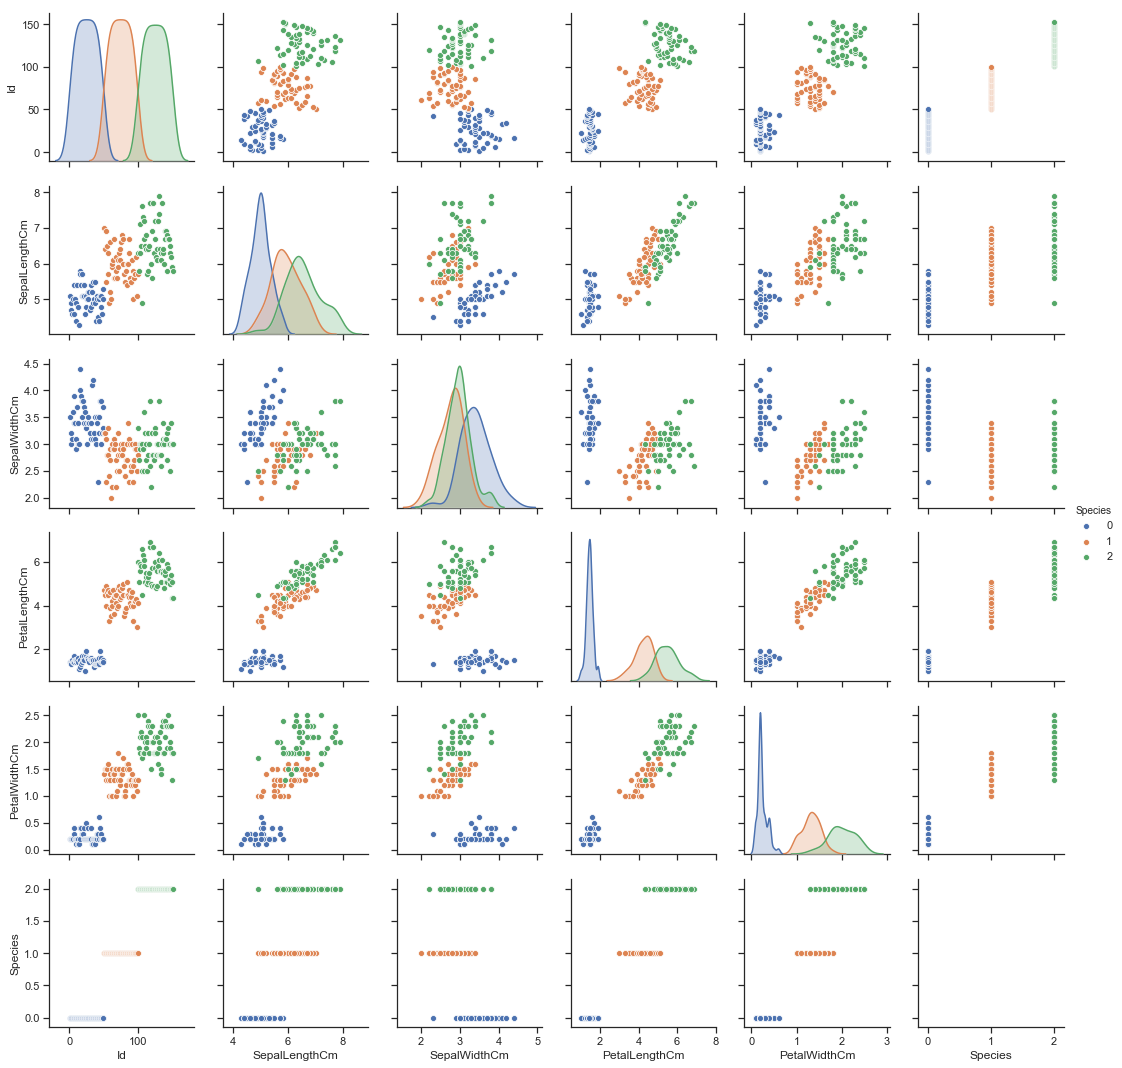

In [58]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris_pf, hue="Species")

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AEA68D198>]],
      dtype=object)

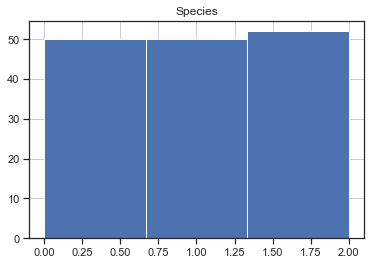

In [59]:
iris_pf.hist(column='Species', bins = 3)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [ ]:
#Did above using pairplot

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [60]:
#Drop Id variable from data
iris_pd = iris_pf.drop(labels = ["Id"], axis = 1)
iris_pd.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Correlation among all variables and give your insights (1 Marks)

In [61]:
iris_pd.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [ ]:
##Insights : 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

### Split data in Training and Validation in 80:20 (1 Marks)

In [36]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Do Feature Scaling ( 1 Marks)

In [ ]:
# Use StandardScaler or similar methods

In [62]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


### Train and Fit NaiveBayes Model(2 Marks)

In [ ]:
#Fit the model

In [65]:
#Initialize Gaussian Naive Bayes
clf = GaussianNB()
#Fitting the training set
clf.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
#Predicting the Test Set
pred_clf = clf.predict(X_test)


array([1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 0, 1, 0])

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=7)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, y_train, cv=kfold, scoring='accuracy')

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)

NB accuracy: 0.991667 (0.025000)


In [ ]:
# show Confusion Matrix

In [72]:
from sklearn import metrics
metrics.confusion_matrix(y_test, pred_clf)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 13]], dtype=int64)

In [ ]:
# show accuracy

In [ ]:
#Show precision and Recall metrics

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [79]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [115]:
iris2 = pd.read_csv("iris.csv")
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [116]:
iris2_pf = iris2.fillna(iris2.median())
iris2_pf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [117]:
#Replace Species type with numbers
iris2_pf.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=True)

In [118]:
iris2_pf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [119]:
iris2_pf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [ ]:
#Nothing to drop

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [95]:
iris2_pf.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [121]:
#No variance is less than 0.1. However, SepalWidthCm seems to be closest to 0.1. Hence, dropping it

In [122]:
iris2_pd = iris2_pf.drop(labels = ["SepalWidthCm"], axis = 1)
iris2_pd.head()

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,1.4,0.2,0
1,2,4.9,1.4,0.2,0
2,3,4.7,1.3,0.2,0
3,4,4.6,1.5,0.2,0
4,5,5.0,1.4,0.2,0


## Question 6

*Plot the scatter matrix for all the variables.*

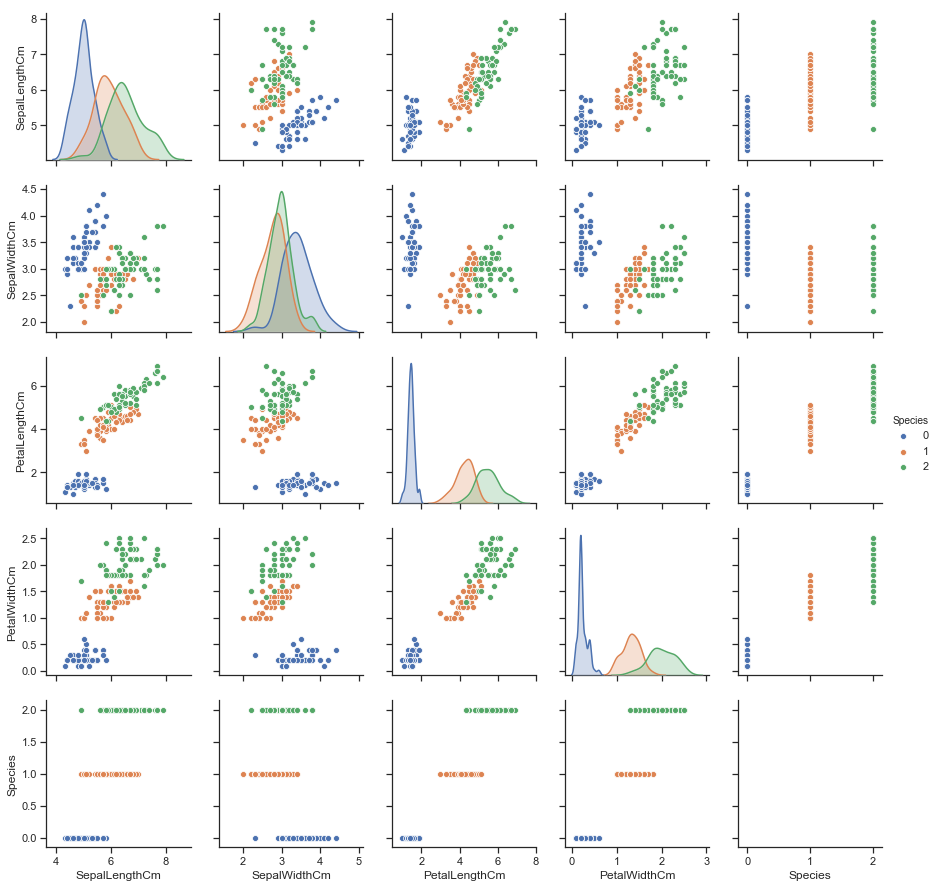

In [138]:
sns.pairplot(iris2_pf.drop(labels=['Id'], axis=1), hue="Species")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [139]:
#from sklearn.model_selection import train_test_split
#X = iris2_pd.loc[:,iris2_pd.columns !='Species']
X = iris2_pd[['SepalLengthCm','PetalLengthCm','PetalWidthCm']]
y = iris2_pd['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [140]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (121, 3)
y_train shape: (121,)
X_test shape: (31, 3)
y_test shape: (31,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the Estimator object 
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model to training set in order to predict classes
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [142]:
# create a prediction array for our test set
y_pred = knn.predict(X_test)

In [165]:
# what is our score?
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [144]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9354838709677419


In [145]:
##Trying the same code with a function with various k-value

In [153]:
k_range = range(1,19)
scores_list = []
mse = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #scores_list.append(knn.score(X_test, y_pred))
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    mse.append(1-knn.score(X_test, y_test))

In [154]:
scores_list

[0.9354838709677419,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871]

In [155]:
mse

[0.06451612903225812,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004,
 0.032258064516129004]

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [158]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,19))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [172]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE

[0.061080586080586086,
 0.05338827838827842,
 0.05338827838827842,
 0.06247918747918746,
 0.05533633033633034,
 0.04050116550116556,
 0.04050116550116556,
 0.048193473193473224,
 0.048193473193473224]

In [181]:
print(" Lowest MSE is: ", min(MSE)) 

 Lowest MSE is:  0.04050116550116556


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [ ]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()